Titanic

타이타닉 문제는 타이타닉 사고 당시 탑승했던 사람들의 신상 정보를 바탕으로 사람들의 생존 여부를 예측하는 모델을 만들어내는 것이 목표입니다.

로드맵

0. 초기 세팅
1. Dataset 확인 
2. EDA
3. feature engineering
4. model 만들기 및 평가
5. conclusion

    0. 초기 세팅

데이터 분석 도구(pandas, numpy), 데이터 시각화 도구(matplotlib, seaborn, plotly), 머신 러닝 도구(sklearn)를 사용합니다

데이터 시각화를 위한 matplotlib.pyploy과 seaborn 모듈을 가져옵니다.

데이터의 NULL값을 찾기 위한 missingno 모듈과 불필요한 경고문을 출력하지 않기 위해 warnings모듈을 가져와 ignore해줍니다

seaborn을 통해 출력 될 그래프의 기본 세팅을 해줍니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
colors = sns.color_palette('Set2')

sns.set_theme(style="whitegrid", palette=colors, context = 'notebook', font_scale=1.5)

    1.Dataset 확인

테이블화 된 데이터를 다루는 데 가장 최적화된 파이썬의 pandas 라이브러리를 사용하여 데이터를 확인해 봅니다

Kaggle에서 dataset은 보통 train, test으로 나뉘어 있습니다.

In [3]:
dbtest = pd.read_csv('본인 컴퓨터 경로명/titanic_test.csv')
dbtrain = pd.read_csv('본인 컴퓨터 경로명/titanic_train.csv')

In [4]:
dbtrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


survival : 생존여부 0 = No, 1 = Yes

pclass : 티켓 등급	1 = 1st, 2 = 2nd, 3 = 3rd

sex	: 성별

Age	: 나이 

sibsp : 타이타닉호에 탑승한 형제자매 / 배우자 수

parch : 타이타닉호에 탑승한 부모/자녀의 수

ticket : 티켓 번호

fare : 여객운임

cabin : 객실 번호	

embarked : 탑승한 곳	C = Cherbourg, Q = Queenstown, S = Southampton

1.1 Null data check

dataset에 존재하는 null값이 모델에 영향을 미치기 때문에 얼마나 분포되어 있는지 확인해야 합니다.

missingno 라이브러리를 이용하여 시각화를 통해 null값이 얼마나 분포되어있는지 확인합니다.

<Axes: >

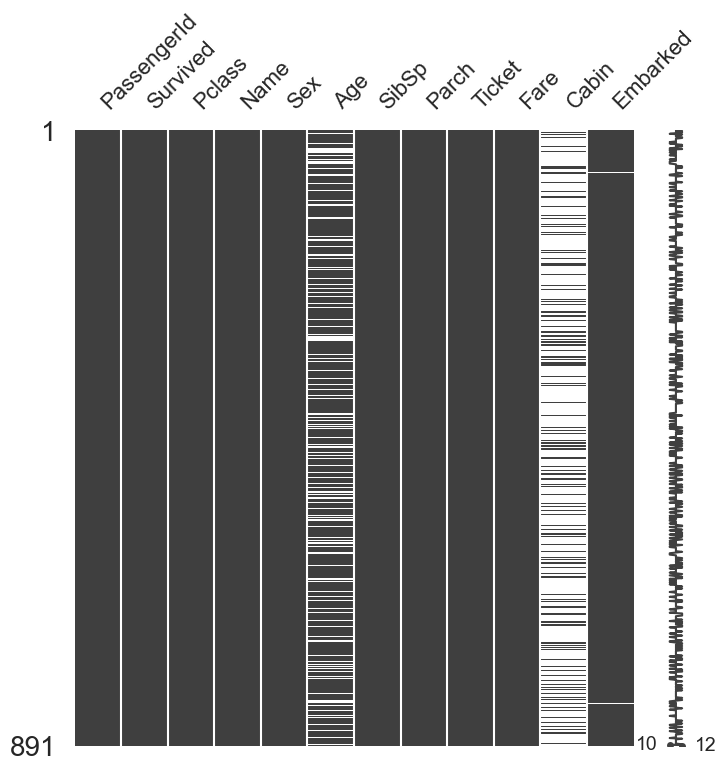

In [5]:
msno.matrix(df=dbtrain.iloc[:,:], figsize=(8,8))

각 열마다 null이 얼마나 있는지 수치화 하는 방법도 있습니다

In [6]:
print('train.csv')
for col in dbtrain.columns:
    msg_train = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (dbtrain[col].isnull().sum() / dbtrain[col].shape[0]))
    print(msg_train)

print('test.csv')
for col in dbtest.columns:
    msg_test = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (dbtest[col].isnull().sum() / dbtest[col].shape[0]))
    print(msg_test)

train.csv
column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%
test.csv
column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fa

train, test 두 군데에서 Age(약 20%) , Cabin(약77%)의 null값이 나왔고, train만 embarked에서(0.22%)의 null값이 나왔음을 알 수 있습니다.

1.2 Target label 확인 (목표변수 확인)

target label이 어떤 분포인지 확인합니다

<Axes: xlabel='Survived', ylabel='count'>

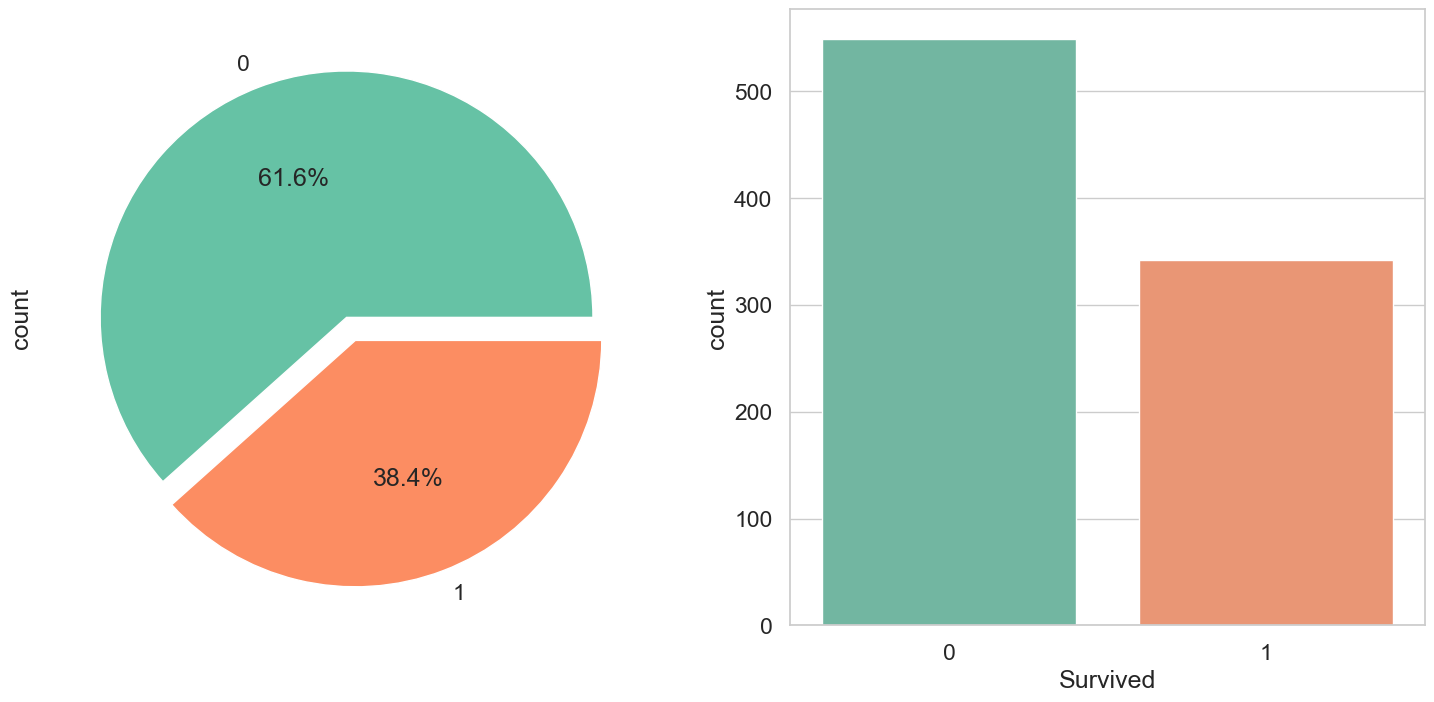

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
dbtrain['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
sns.countplot(x='Survived', data=dbtrain,ax=ax[1])

38.4%가 살아남았음을 알 수 있습니다

    2. EDA - 탐색적 데이터 분석

2.1 Pclass (티켓등급)

Pclass의 인구수 분포

<Axes: xlabel='Pclass', ylabel='count'>

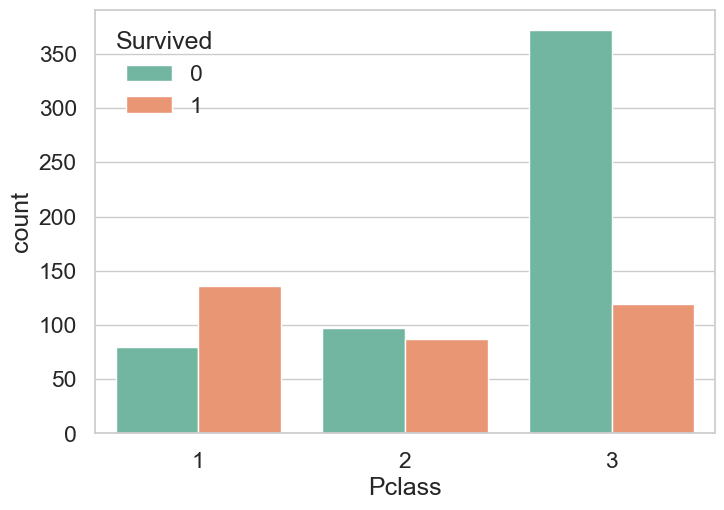

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=dbtrain)

Pclass의 Survived분포

<Axes: xlabel='Pclass', ylabel='count'>

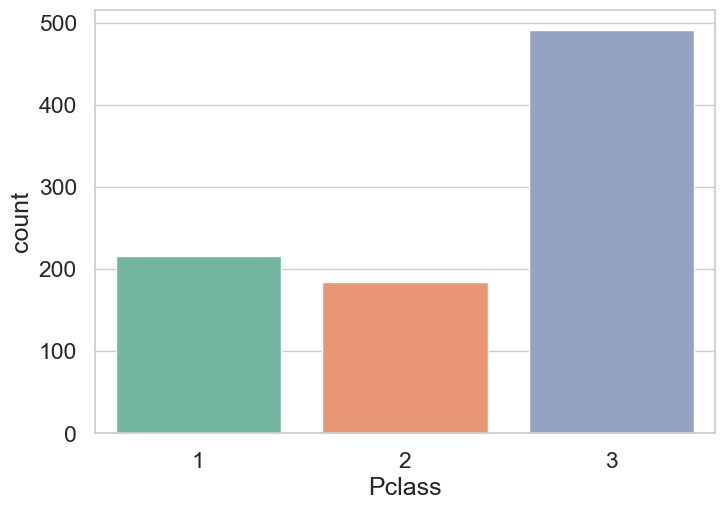

In [9]:
sns.countplot(x='Pclass', data=dbtrain)

Pclass의 생존률

<Axes: xlabel='Pclass'>

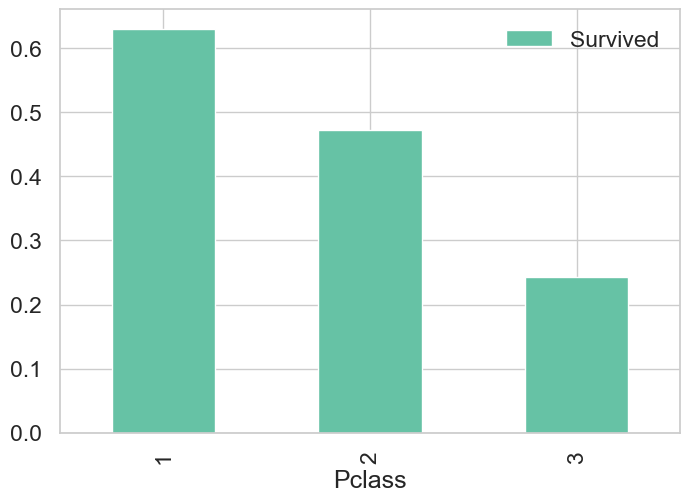

In [10]:
dbtrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar()

Pclass가 3인 곳에서 가장 많은 사람이 탔고, 생존률은 1이 가장 높은 것을 확인 할 수 있습니다.

생존률이 1,2,3 순서대로 높으니 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있습니다.

2.2 Sex(성별)

Sex의 Survived 분포

<Axes: xlabel='Sex', ylabel='count'>

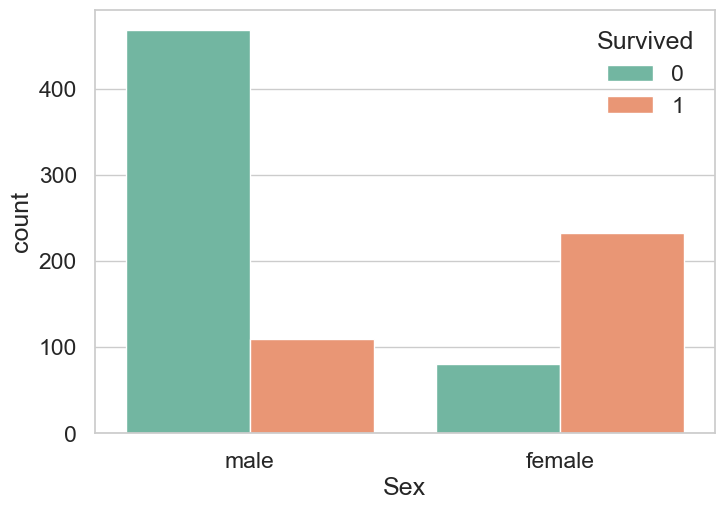

In [11]:
sns.countplot(x='Sex', hue='Survived', data=dbtrain)

성별에 따른 생존자 숫자

<Axes: xlabel='Sex', ylabel='count'>

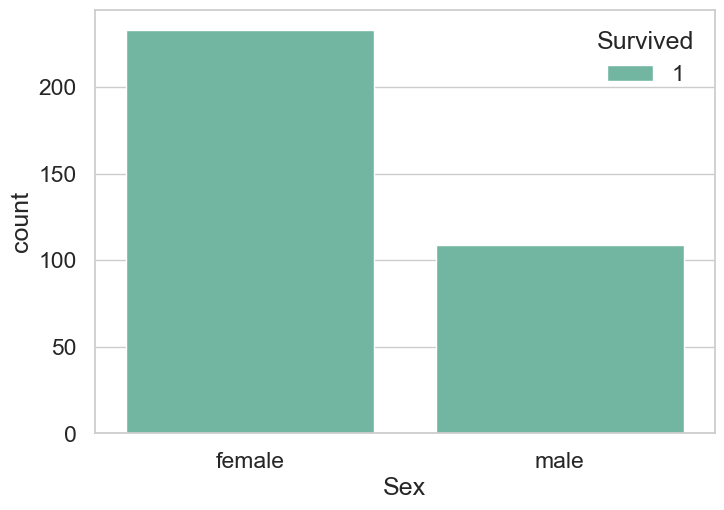

In [14]:
sp=dbtrain[dbtrain['Survived']==0].index
dbtrain_save = dbtrain.drop(sp)
sns.countplot(x='Sex', hue='Survived', data=dbtrain_save)

train 데이터 셋의 성별에 따른 분포 상태(표)

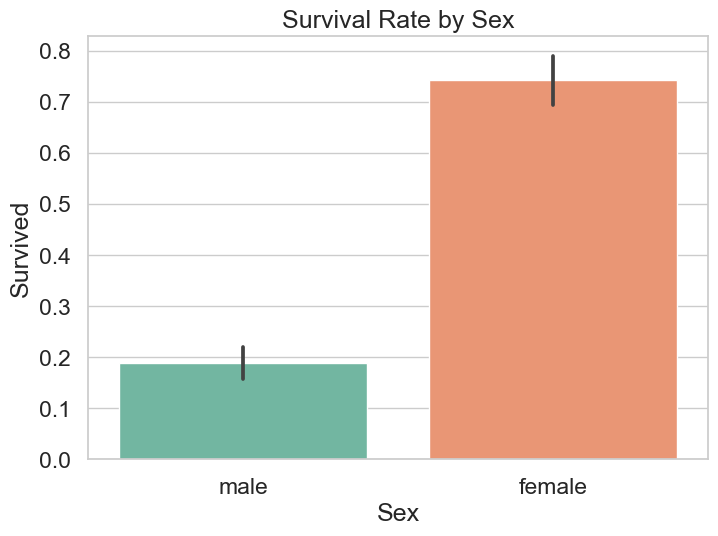

In [15]:
sns.barplot(x='Sex', y='Survived', data=dbtrain)
plt.title('Survival Rate by Sex')
plt.show()

여성은 약 75%확률로 살아남고, 남자는 약 20%확률로 살아남은 것을 알 수 있습니다.

성별도 예측 모델에 쓰일 중요한 feature가 될 수 있음을 알 수 있습니다.

2.3 Sex and Pclass (성별, 티켓등급)

Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는지  확인 해봅니다.

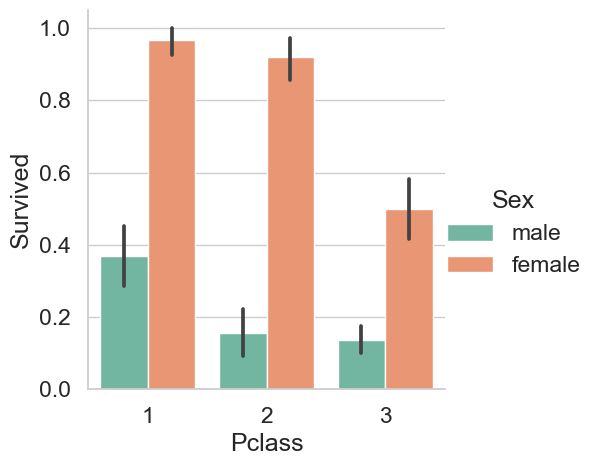

In [16]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=dbtrain)

plt.show()

2.4 Age(나이)

나이의 분포 확인

In [15]:
print('oldest : {:.1f}'.format(dbtrain['Age'].max()))
print('youngest : {:.1f}'.format(dbtrain['Age'].min()))
print('average : {:.1f}'.format(dbtrain['Age'].mean()))

oldest : 80.0
youngest : 0.4
average : 29.7


생존에 따른 나이의 histogram

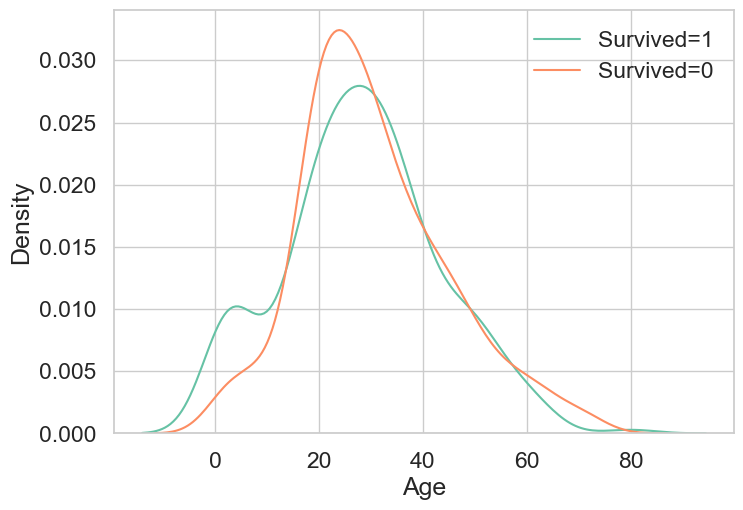

In [17]:
fig, ax=plt.subplots(1,1)
sns.kdeplot(dbtrain[dbtrain['Survived']==1]['Age'],ax=ax)
sns.kdeplot(dbtrain[dbtrain['Survived']==0]['Age'],ax=ax)

plt.legend(['Survived=1', 'Survived=0'])

생존자 중 나이가 어린 경우가 많음을 알 수 있습니다.

Pclass에 따른 나이의 histogram

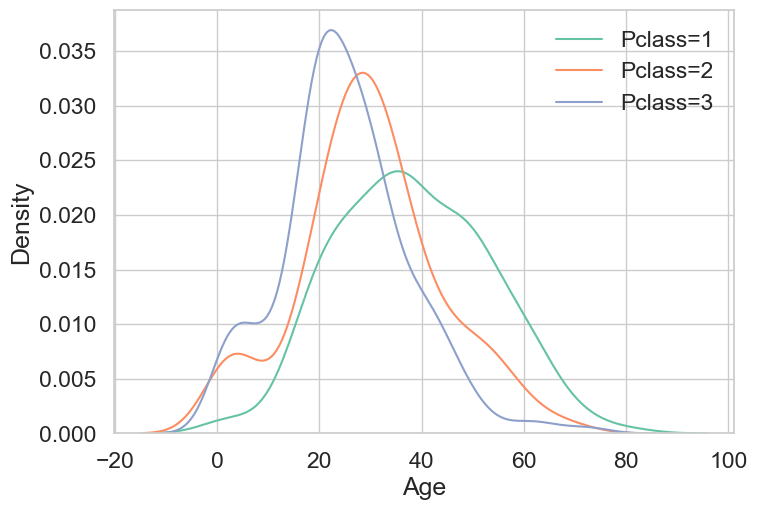

In [18]:
sns.kdeplot(dbtrain[dbtrain['Pclass']==1]['Age'])
sns.kdeplot(dbtrain[dbtrain['Pclass']==2]['Age'])
sns.kdeplot(dbtrain[dbtrain['Pclass']==3]['Age'])
plt.legend(['Pclass=1', 'Pclass=2', 'Pclass=3'])

Pclass가 높을 수록 나이가 많은 사람의 비중이 커지는 것을 알 수 있습니다.

나이대에 따른 생존률

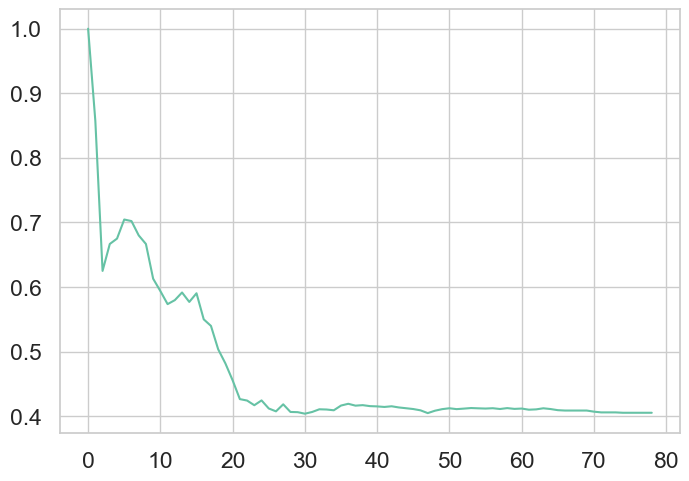

In [19]:
arr=[]
for i in range(1,80):
    arr.append(dbtrain[dbtrain['Age']<i]['Survived'].sum()/len(dbtrain[dbtrain['Age']<i]['Survived']))
plt.plot(arr)

나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있습니다.

나이가 중요한 feature임을 알 수 있습니다.

2.5 Pclass, Sex, Age (티켓 등급, 성별, 나이)

Pclass, Sex, Age 모두에 대하여 seaborn의 violinplot을 확인해봅니다.

Pclass에 따른  Age 분포와 생존 여부

<Axes: xlabel='Pclass', ylabel='Age'>

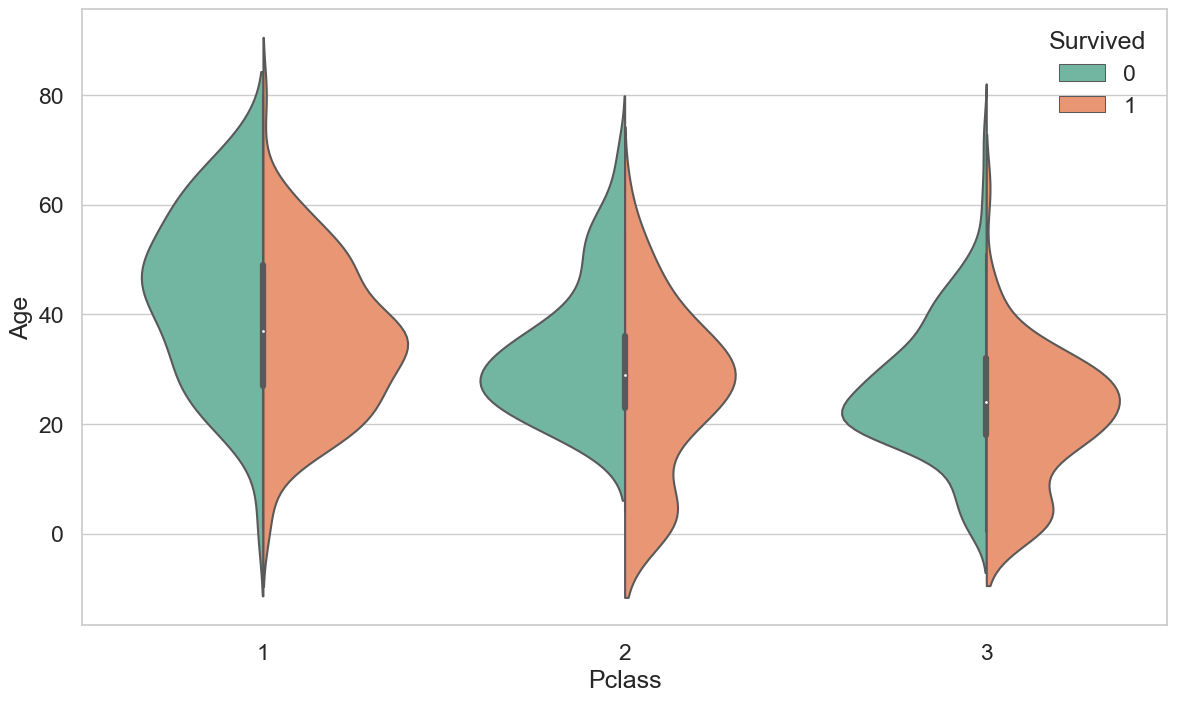

In [20]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Pclass', y='Age', hue = 'Survived', data=dbtrain, split=True)

Sex에 따른 Age분포와 생존 여부

<Axes: xlabel='Sex', ylabel='Age'>

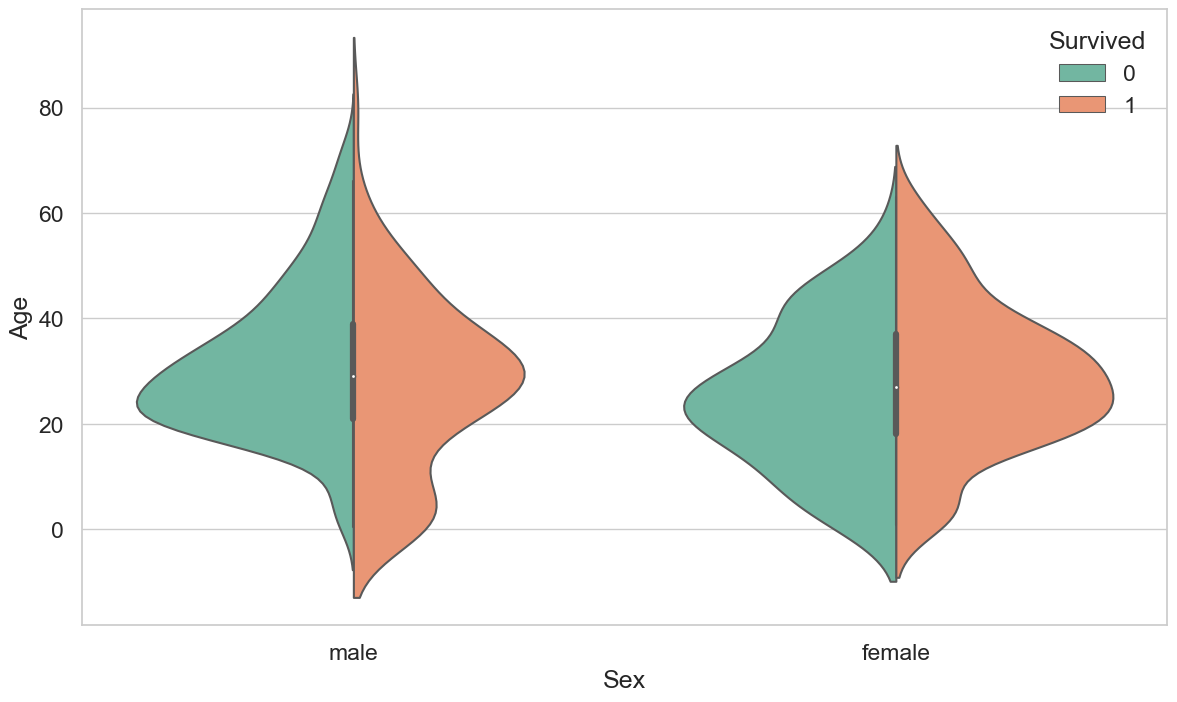

In [22]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Sex', y='Age', hue = 'Survived', data=dbtrain, split=True)

종합적으로 봤을 때, 여자와 아이가 생존률이 높은 것을 알 수 있습니다.

2.6 Embarked (탑승한 곳)

탑승한 곳에 따른 생존률을 확인해봅니다

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


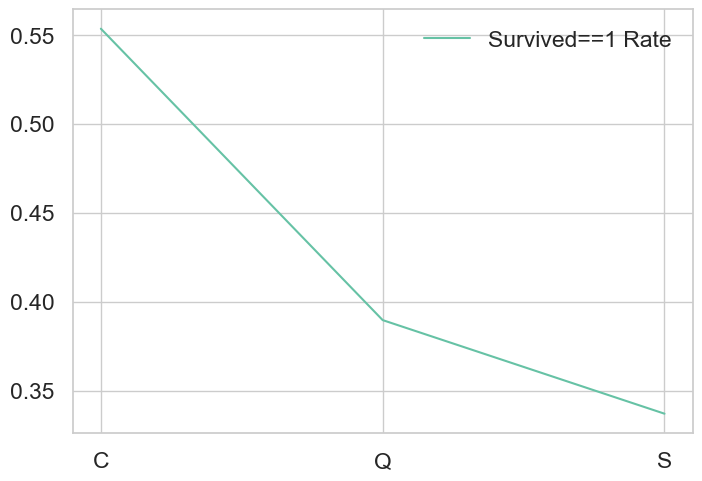

In [21]:
print(dbtrain[['Embarked', 'Survived']].groupby(['Embarked']).mean())
plt.plot(dbtrain[['Embarked', 'Survived']].groupby(['Embarked']).mean())
plt.legend(['Survived==1 Rate'])

C가 가장 높은 생존률을 갖고 있는 것을 알 수 있습니다.

탑승한 곳에 따른 성별 분포

<Axes: xlabel='Embarked', ylabel='count'>

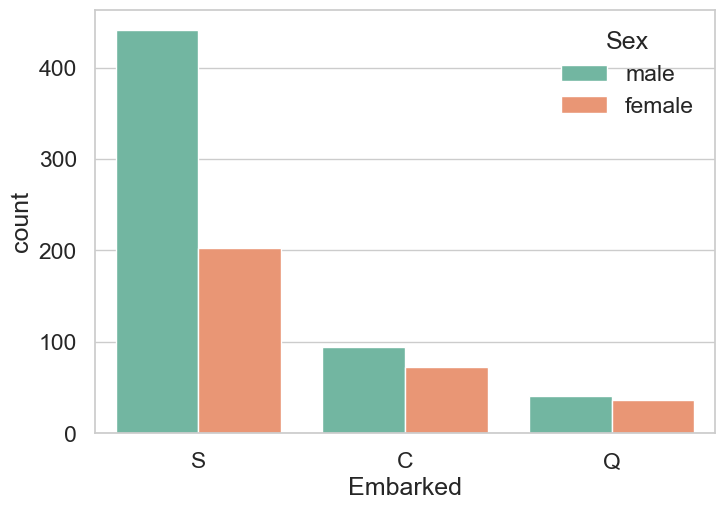

In [23]:
sns.countplot(x='Embarked',hue='Sex', data=dbtrain)

S에서 남자가 여자보다 많이 탔고, C와 Q는 비슷한 비율로 탄 것을 알 수 있습니다.

탑승한 곳에 따른 생존 분포

<Axes: xlabel='Embarked', ylabel='count'>

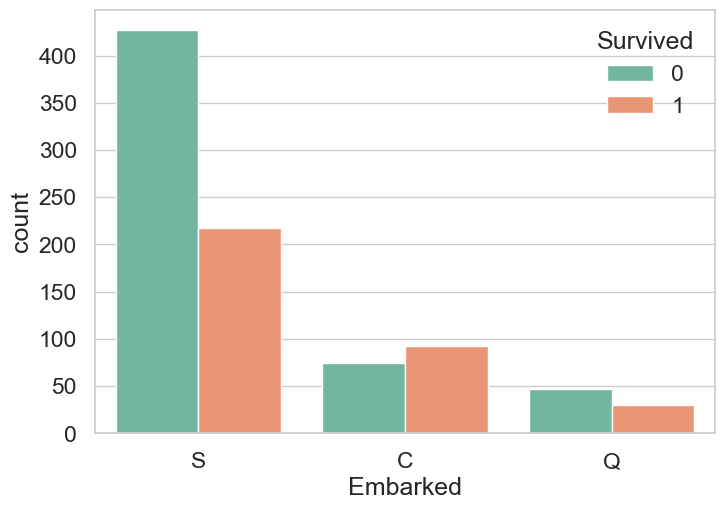

In [24]:
sns.countplot(x='Embarked',hue='Survived', data=dbtrain)

S는 생존률이 다른 곳보다 낮은 것을 알 수 있습니다.

탑승한 곳에 따른 Pclass 분포

<Axes: xlabel='Embarked', ylabel='count'>

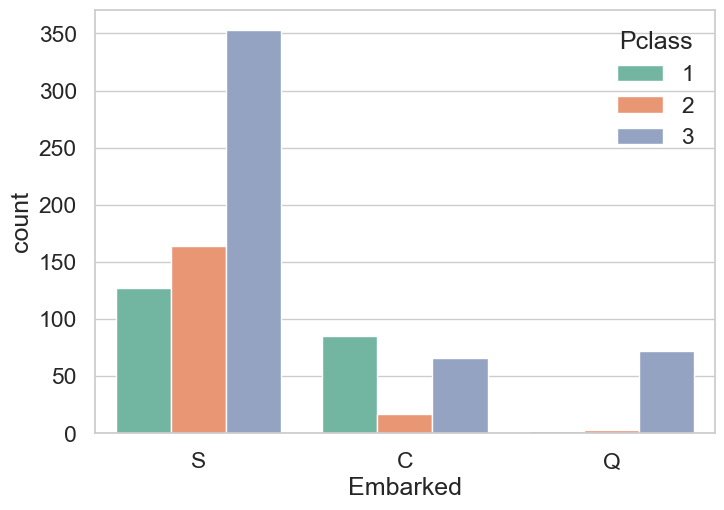

In [25]:
sns.countplot(x='Embarked',hue='Pclass', data=dbtrain)

C가 생존률이 높은 이유는 Pclass가 1인 사람들이 많이 탔기 때문인 것을 알 수 있습니다.

2.7 Family - SibSp(형제 자매) + Parch(부모 자녀)

SibSp와 Parch를 합하여 Family라는 새로운 변수를 생성하였습니다.

가족 크기에 따른 탑승객 수 분포

<Axes: xlabel='FamilySize', ylabel='count'>

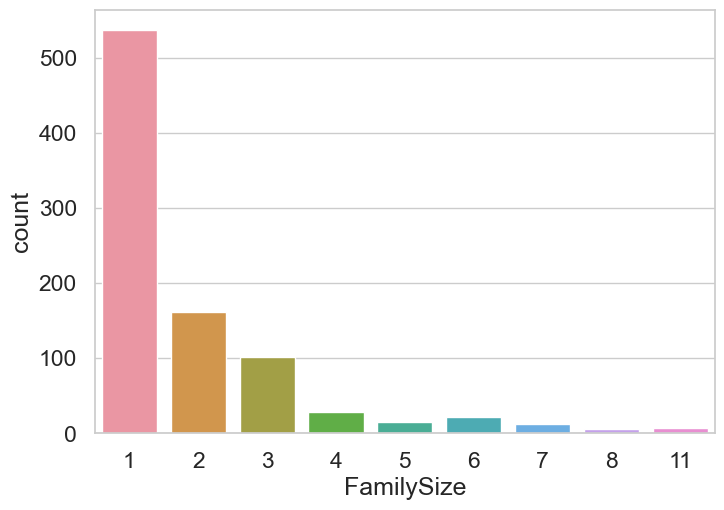

In [31]:
dbtrain['FamilySize'] = dbtrain['SibSp']+dbtrain['Parch']+1 # 본인을 포함
dbtest['FamilySize'] = dbtest['SibSp']+dbtest['Parch']+1 # 본인을 포함
sns.countplot(x='FamilySize',data=dbtrain)

가족의 크기가 1 ~ 11이고 1인 가족이 많음을 알 수 있습니다.

가족 크기에 따른 생존률

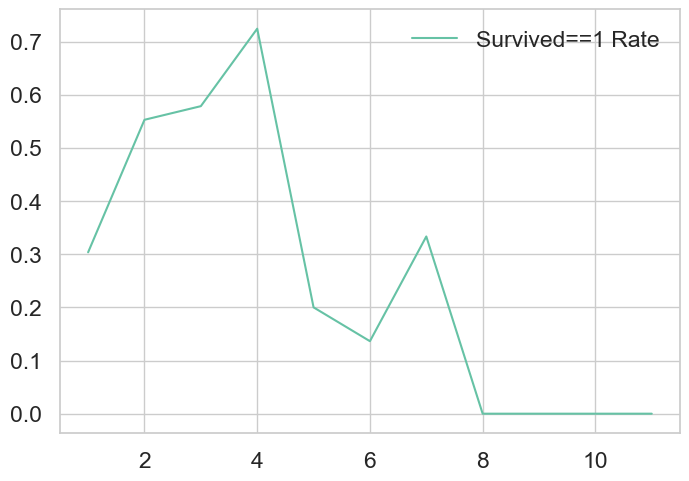

In [26]:
plt.plot(dbtrain[['FamilySize', 'Survived']].groupby(['FamilySize']).mean())
plt.legend(['Survived==1 Rate'])

4명인 경우 가장 생존률이 높고, 가족 수가 많아질 수록 또는 적어질 수록 생존률이 떨어지는 모습을 알 수 있습니다.

2.8 Fare (여객운임)

Fare는 연속적인 데이터로 볼 수 있습니다.

skewness : 4.79


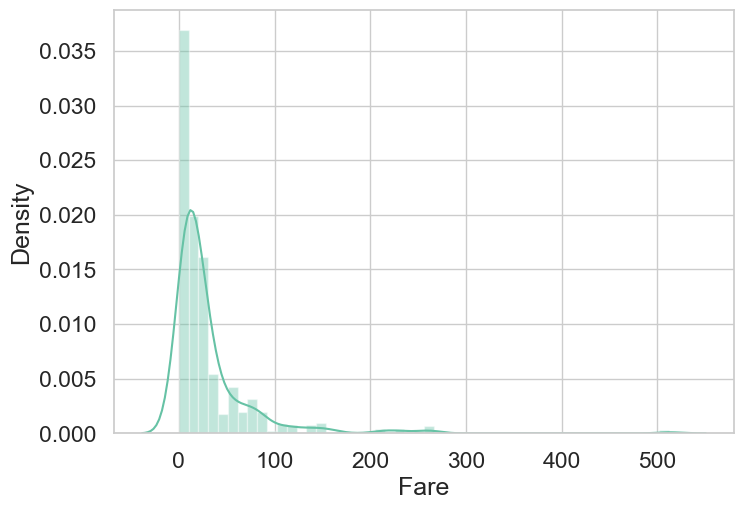

In [26]:
sns.distplot(dbtrain['Fare'])
print('skewness :',round(dbtrain['Fare'].skew(), 2))

skewness는 비대칭도 인데 4.79로 많이 비대칭 이므로 그대로 모델에 넣어준다면 잘못 학습할 수 있기 때뮨에 log를 취하여 정규분포와 가까운 모양으로 만들어 줍니다.

In [28]:
dbtest.loc[dbtest.Fare.isnull(), 'Fare'] = dbtest['Fare'].mean() 

dbtrain['Fare'] = dbtrain['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
dbtest['Fare'] = dbtest['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

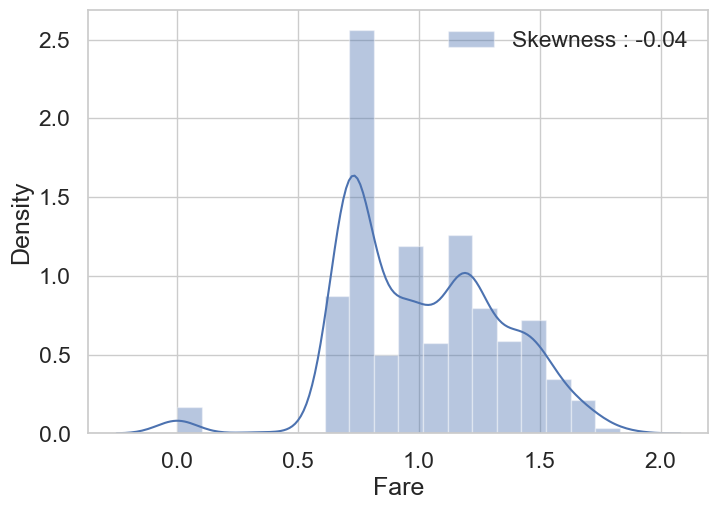

In [29]:
fig, ax = plt.subplots(1, 1)
g = sns.distplot(dbtrain['Fare'], color='b', label='Skewness : {:.2f}'.format(dbtrain['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

이제 비대칭성이 많이 사라진 것을 알 수 있습니다. (skewness = 0.44)

이 부분은 feature engineering에 해당하는 부분이긴 하지만 미리 진행하였습니다.

feature engineering이란 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature을 추가하는 과정입니다. Ex) 비대칭성 줄이기, 형제자매 + 부모수 = 가족수 와 같은 작업

2.9 Cabin

Cabin은 null이 77%이므로, 생존에 영향을 미칠 중요한 정보를 얻기 힘듭니다.

따라서 모델에 사용할 feature에 포함하지 않겠습니다.

2.10 Ticket (티켓 번호)

형식이나 분포가 너무 불규칙적인 부분이 많아 모델에 사용할 feature에 포함하지 않겠습니다.

In [30]:
dbtrain['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

    3. Feature Engineering

가장 먼저 dataset에 있는 null을 지우거나 채워야합니다.

Feature Engineering은 실제 모델의 학습에 쓰려고 하는 것이기 때문에 train 뿐만 아니라 test에도 똑같이 적용해야 합니다.

3.1.1 filling null data

In [32]:
print(sum(dbtrain['Age'].isnull())) # null counting

177


Age에는 null data가 177개, 약 20% 있다.

이것을 채울 수 있는 방법은 여러가지가 있습니다.

여기서는 title + statistics를 사용할 것입니다.

영어에는 Miss, Mr, Mrs, Dr 같은 title이 존재하는데 각 탑승객의 이름에는 이런 title이 존재하므로 이것을 사용할 것입니다.

pandas에는 data를 string으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있으며 이를 사용하여 title을 쉽게 추출할 수 있습니다.

title을 Initial column에 저장하겠습니다.

In [33]:
dbtrain['Initial']=dbtrain.Name.str.extract('([A-Za-x]+)\.')
dbtest['Initial']=dbtest.Name.str.extract('([A-Za-x]+)\.')

In [34]:
pd.crosstab(dbtrain['Initial'],dbtrain['Sex']).T.style.background_gradient(cmap='BuPu')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,2,40,0,0,0,517,0,0,6,1


위 테이블을 통해 남, 여가 사용하는 initial을 구분할 수 있습니다.

replace method를 사용하여 특정 데이터값을 원하는 값으로 치환해줍니다.

In [34]:
dbtrain['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

dbtest['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

Initial에 따른 생존 분포

<Axes: xlabel='Initial'>

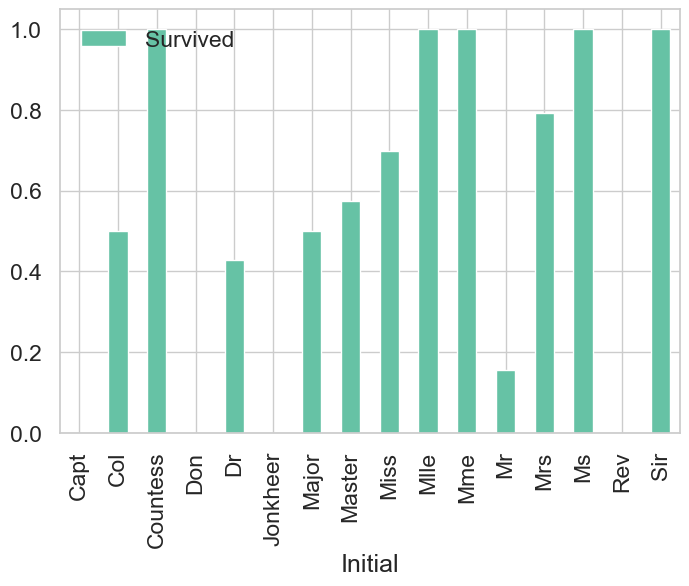

In [36]:
p = dbtrain[['Initial','Survived']].groupby(['Initial']).mean() 

p.plot(kind='bar')

여성과 관계있는 Miss, Mrs이 생존률이 높은 것을 볼 수 있습니다.

statistics를 활용하여 null값을 채워줄 것이다.

여기서 train 데이터만 참고하여 test 데이터를 채워줘야 하며 항상 test 데이터를 모르는 상태로 놔둔다고 생각해야 합니다.

Age

Age의 평균을 이용하여 null 값을 채웁니다.

padas dataframe을 다룰 때에는 boolean array를 이용해 indexing하는 방법이 있습니다.

Age 열의 null값인 셀을 해당 initial의 평균 나이로 치환해줍니다.

In [37]:
dbtrain.loc[(dbtrain.Age.isnull())&(dbtrain.Initial=='Mr'),'Age'] = 33
dbtrain.loc[(dbtrain.Age.isnull())&(dbtrain.Initial=='Mrs'),'Age'] = 36
dbtrain.loc[(dbtrain.Age.isnull())&(dbtrain.Initial=='Master'),'Age'] = 5
dbtrain.loc[(dbtrain.Age.isnull())&(dbtrain.Initial=='Miss'),'Age'] = 22
dbtrain.loc[(dbtrain.Age.isnull())&(dbtrain.Initial=='Other'),'Age'] = 46

dbtest.loc[(dbtest.Age.isnull())&(dbtest.Initial=='Mr'),'Age'] = 33
dbtest.loc[(dbtest.Age.isnull())&(dbtest.Initial=='Mrs'),'Age'] = 36
dbtest.loc[(dbtest.Age.isnull())&(dbtest.Initial=='Master'),'Age'] = 5
dbtest.loc[(dbtest.Age.isnull())&(dbtest.Initial=='Miss'),'Age'] = 22
dbtest.loc[(dbtest.Age.isnull())&(dbtest.Initial=='Other'),'Age'] = 46

3.1.2 Fill Null in Embarked

In [38]:
print(sum(dbtrain['Embarked'].isnull()))

2


Embarked는 null값이 2개이고 S에 가장 많은 탑승객이 있었으므로, 간단하게 null값을 S로 채워줍니다.

In [39]:
dbtrain['Embarked'].fillna('S', inplace=True) 

S로 채워져서 null 값이 사라졌는지 확인해줍니다.

In [40]:
print(sum(dbtrain['Embarked'].isnull()))

0


3.2 Change Age(연속적인 데이터 카테고리화 하기)

Age는 연속적인 feature입니다.

연속적인 상태로 써도 모델을 만들 수 있지만 카테고리화(구간화) 해주고 모델을 만들어 볼 수 도 있습니다.
다만 연속적인 값을 카테고리화 하면 데이터의 손실이 생길 수도 있습니다.

첫번째 카테고리 방법으로 loc을 이용해 나이를 10살 간격으로 나눠줍니다.

In [41]:
dbtrain['Age_cat'] = 0
dbtrain.loc[dbtrain['Age'] < 10, 'Age_cat'] = 0
dbtrain.loc[(10 <= dbtrain['Age']) & (dbtrain['Age'] < 20), 'Age_cat'] = 1
dbtrain.loc[(20 <= dbtrain['Age']) & (dbtrain['Age'] < 30), 'Age_cat'] = 2
dbtrain.loc[(30 <= dbtrain['Age']) & (dbtrain['Age'] < 40), 'Age_cat'] = 3
dbtrain.loc[(40 <= dbtrain['Age']) & (dbtrain['Age'] < 50), 'Age_cat'] = 4
dbtrain.loc[(50 <= dbtrain['Age']) & (dbtrain['Age'] < 60), 'Age_cat'] = 5
dbtrain.loc[(60 <= dbtrain['Age']) & (dbtrain['Age'] < 70), 'Age_cat'] = 6
dbtrain.loc[70 <= dbtrain['Age'], 'Age_cat'] = 7

dbtest['Age_cat'] = 0
dbtest.loc[dbtest['Age'] < 10, 'Age_cat'] = 0
dbtest.loc[(10 <= dbtest['Age']) & (dbtest['Age'] < 20), 'Age_cat'] = 1
dbtest.loc[(20 <= dbtest['Age']) & (dbtest['Age'] < 30), 'Age_cat'] = 2
dbtest.loc[(30 <= dbtest['Age']) & (dbtest['Age'] < 40), 'Age_cat'] = 3
dbtest.loc[(40 <= dbtest['Age']) & (dbtest['Age'] < 50), 'Age_cat'] = 4
dbtest.loc[(50 <= dbtest['Age']) & (dbtest['Age'] < 60), 'Age_cat'] = 5
dbtest.loc[(60 <= dbtest['Age']) & (dbtest['Age'] < 70), 'Age_cat'] = 6
dbtest.loc[70 <= dbtest['Age'], 'Age_cat'] = 7

이제 중복되는 Age 열을 제거합니다.

In [42]:
dbtrain.drop(['Age'], axis=1, inplace=True)
dbtest.drop(['Age'], axis=1, inplace=True)

3.3 Change Initial, Embarked and Sex(string to numerical) (레이블 인코딩)

Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.

이러한 카테고리로 표현되어 있는 데이터를 모델에 넣어주기 전에 컴퓨터가 인식할 수 있도록 수치화 해줘야합니다.

map method를 통해 사전 순서대로 정리하여 mapping 시켜줍니다.

In [43]:
dbtrain['Initial'] = dbtrain['Initial'].map({'Master' : 0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
dbtest['Initial'] = dbtest['Initial'].map({'Master' : 0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

Embarked도 C, Q, S로 이루어져 있으니 map을 통해 바꿔주겠습니다.

In [44]:
dbtrain['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Embarked가 C, Q, S로 이루어져 있는 것을 확인했으므로 map을 사용하여 바꿔줍니다.

In [49]:
dbtrain['Embarked'] = dbtrain['Embarked'].map({'C':0, 'Q':1, 'S':2})
dbtest['Embarked'] = dbtest['Embarked'].map({'C':0, 'Q':1, 'S':2})

null값이 사라졌는지 확인해봅니다.

In [46]:
dbtrain['Embarked'].isnull().any() #null값이 하나도 없으면 false

False

Sex도 map을 이용해 바꿔줍니다.

In [47]:
dbtrain['Sex'] = dbtrain['Sex'].map({'female':0, 'male':1})
dbtest['Sex'] = dbtest['Sex'].map({'female':0, 'male':1})

이제 각 feature간의 상관관계를 확인해 보겠습니다.

두 변수간의 피어슨 상관 계수(Pearson correlation)을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다.

<Axes: >

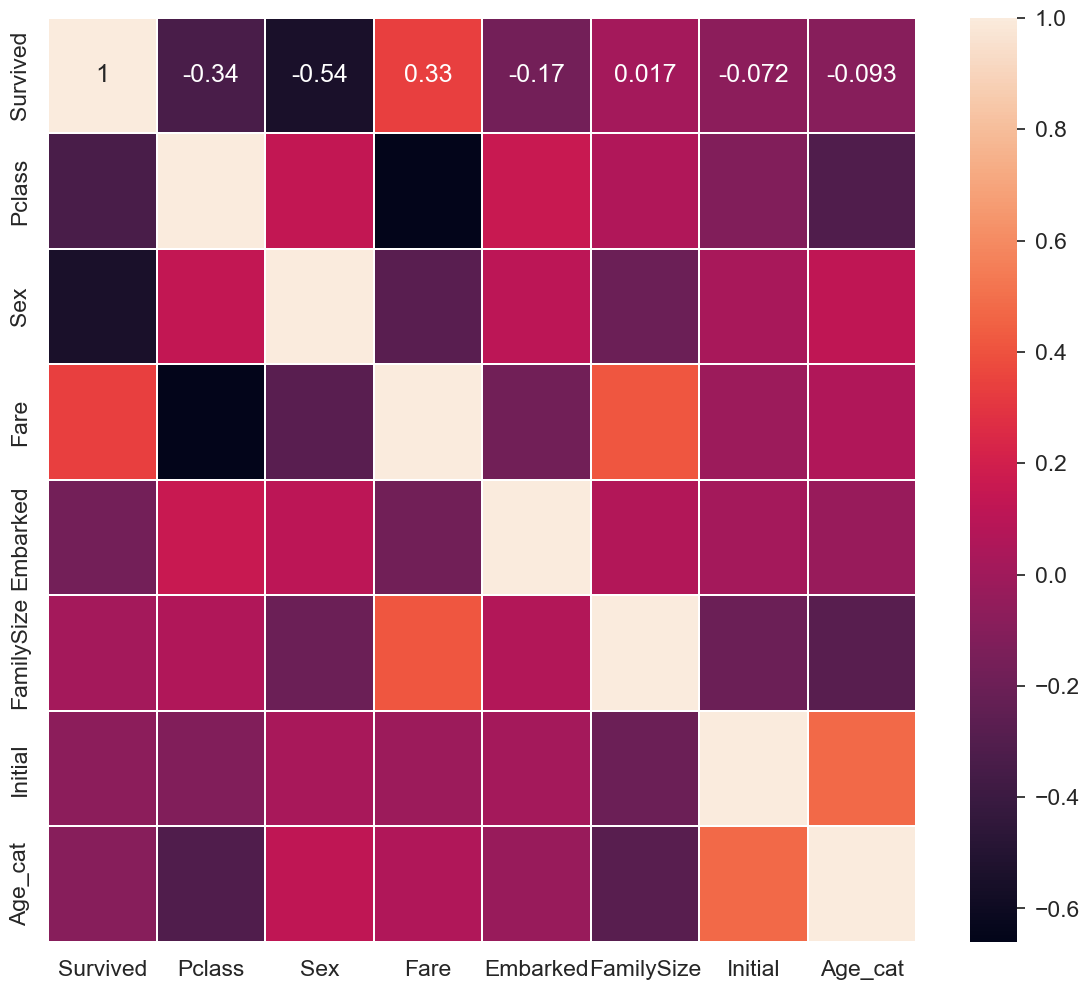

In [50]:
heatmap_data = dbtrain[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
plt.figure(figsize = (14,12))
sns.heatmap(heatmap_data.astype(float).corr(), annot=True, linewidths = 0.1)

EDA에서 봤듯이 Sex, Pclass 가 Survived와 상관관계가 어느 정도 있다는 것을 알 수 있습니다.

그리고 fare과 Embarked도 상관관계가 있음을 알 수 있습니다.

또한 서로 강한 상관관계를 갖는 feature들이 없으며 이는 모델을 학습 시킬 때, 불필요한(redundant, superfluous) feature 가 없다는 것을 의미합니다.

3.4 One-hot encoding on Initial and Emabarked

원-핫 인코딩(One-Hot Encoding)은 범주형 데이터를 처리할 때 사용되는 인코딩 기법 중 하나입니다.

이 방법은 범주형 변수의 각 범주(카테고리)를 대표하는 새로운 이진 열을 생성하여, 해당 범주에 속하는 경우 1로, 속하지 않는 경우 0으로 표시합니다. 

결과적으로, 각 범주는 벡터 공간에서 하나의 축을 형성하며, 각 데이터 포인트는 이 공간 내에서 하나의 위치를 차지하게 됩니다.

원-핫 인코딩은 머신러닝 모델이 범주형 데이터를 이해하고, 범주 간의 동등한 처리를 보장할 수 있도록 해줍니다. 

하지만, 범주의 수가 매우 많은 경우 데이터의 차원이 급격히 증가하는 차원의 저주 문제를 초래할 수 있습니다.

수치화된 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 위해 one-hot encoding을 해줄 것입니다.

Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 

In [51]:
dbtrain = pd.get_dummies(dbtrain, columns = ['Initial'], prefix = 'Initial')
dbtest = pd.get_dummies(dbtest, columns = ['Initial'])

In [52]:
dbtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,False,False,True,False


One-hot encoding으로 매핑하여 오른쪽에 새로운 initial열에 생겼습니다.

Embarked에도 적용해주겠습니다.

In [53]:
dbtrain = pd.get_dummies(dbtrain, columns=['Embarked'])
dbtest = pd.get_dummies(dbtest, columns=['Embarked'])

3.5 Drop columns

이제 필요한 columns만 남기고 다 지워주겠습니다.

In [54]:
dbtrain.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
dbtest.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [55]:
dbtrain.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,0.683603,2,2,False,False,True,False,False,False,True
1,1,1,0,1.450832,2,3,False,False,False,True,True,False,False
2,1,3,0,0.727559,1,2,False,True,False,False,False,False,True
3,1,1,0,1.379314,2,3,False,False,False,True,False,False,True
4,0,3,1,0.735091,1,3,False,False,True,False,False,False,True


In [56]:
dbtest.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,0.721667,1,3,False,False,True,False,False,True,False
1,3,0,0.665730,2,4,False,False,False,True,False,False,True
2,2,1,0.820148,1,6,False,False,True,False,False,True,False
3,3,1,0.769647,1,2,False,False,True,False,False,False,True
4,3,0,0.919718,3,2,False,False,False,True,False,False,True


dbtest에 Survived column이 없는 것만 빼면 train과 test는 같은 columns를 가지고 있습니다.

    4. 모델 만들기

이제 sklearn을 이용하여 본격적으로 머신러닝 모델을 만들어줍니다.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

이 문제는 target class(Survived)가 0, 1로 이루어져 있으므로 이진 분류 문제입니다.

train set의 Survived를 제외한 input을 가지고 모델을 최적화 시켜서 각 샘플(탑승객)의 생존 유무를 판단하는 모델을 만들면 됩니다.

4.1 Preparation - Split dataset into train, valid, test set

먼저, 학습에 쓰일 데이터와, target label(Survived)를 분리합니다.

In [58]:
xtrain = dbtrain.drop('Survived', axis=1).values
target_label = dbtrain['Survived'].values
xtest=dbtest.values

보통 train test만 언급되지만, 좋은 모델들 만들기 위하여 위해서 우리는 valid set을 따로 만들어 모델을 평가해보겠습니다.

train_test_split을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [59]:
xtr, xvld, ytr, yvld = train_test_split(xtrain, target_label, test_size = 0.3, random_state=2018)

랜덤 포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다.

각 머신러닝에는 여러 파라미터들이 있습니다. 

랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf등 여러 파라미터들이 존재합니다.

이것이 어떻게 세팅 되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.

일단 기본 default 세팅 먼저 진행할 것이며 모델 객체를 만들고, fit메소드로 학습시킵니다.

그런 후 valid set input을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻겠습니다.

4.2 Model generation and prediction

In [60]:
model = RandomForestClassifier()
model.fit(xtr, ytr)
prediction= model.predict(xvld)

모델을 세우고 예측까지 진행하였습니다.

In [61]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(yvld.shape[0], 100 * metrics.accuracy_score(prediction, yvld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


4.4 Prediction on Test set

이제 모델이 학습하지 않았던 테스트 셋을 모델에 주어서, 생존여부를 예측해 보겠습니다.

이 결과는 contest에 submission이므로 결과는 해당 contest의 leaderboard에서 확인할 수 있습니다.

캐글에서 준 파일인 gender_submission.csv파일을 읽어서 제출 준비를 합니다.

In [62]:
submission = pd.read_csv('C:/DA/data/gender_submission.csv')

In [63]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


이제 testset에 대하여 예측을 하고, 결과를 csv 파일로 저장하겠습니다.

In [64]:
prediction = model.predict(xtest)
submission['Survived'] = prediction

In [65]:
submission.to_csv('본인 컴퓨터 경로명/submission.csv',index=False)

    5.Conclusion

타이타닉 대회에 submission 파일을 제출하면 자신의 등수를 확인 할 수 있습니다.

https://www.kaggle.com/competitions/titanic/overview

이렇게 타이타닉 데이터를 사용하여 머신러닝 모델을 만들어보는 과정을 담아봤습니다. 